In [1]:
# %reload_ext autoreload

In [2]:
%load_ext autoreload
%autoreload 1

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


#from trampact.preprocess import get_data, drop_tx_columns
#from trampact.plot import draw_hist

In [ ]:
# Only run once 
%aimport trampact.preprocess
%aimport trampact.plot
%matplotlib inline

In [5]:
#!pwd

/Users/Dandan/code/eangelid/trampact/notebooks


In [6]:
'''IRIS_T1_CSV = 'iris_T1.csv'
IRIS_T2_CSV = 'iris_T2.csv'
BD_GENT_2006 = 'BD_GENT_2006.csv'
BD_GENT_2016 = 'BD_GENT_2016.csv''''

## Load ALL dataframes

#### Load T1 and T2 IRIS codes
Attn: The `get_data()` method automatically sets `iris_id` as the index

In [6]:
iris_T1 = pd.read_csv('~/code/eangelid/trampact/raw_data/iris_T1.csv')

In [19]:
iris_T1.dtypes

iris_id      int64
NOM_IRIS    object
dtype: object

In [7]:
iris_T2__full = pd.read_csv('~/code/eangelid/trampact/raw_data/iris_T2.csv')

In [12]:
# drop other columns - only keep index (iris_id) and IRIS label (name)
iris_T2 = iris_T2__full[['iris_id','NOM_IRIS']]
iris_T2

,iris_id,NOM_IRIS
0,61230107,Centre Ville
1,61230103,Les Pomarels
2,61230102,Les Paluds
3,61230101,Le Lac
4,60883102,Parc des Sports
...,...,...
64,60880202,Port
65,60880201,Garibaldi
66,60880103,Vieux Nice-Visitation
67,60880102,Vieux Nice-Sainte Reparate


#### Load demographic data

In [13]:
bd_gent_2006 = pd.read_csv('~/code/eangelid/trampact/raw_data/BD_GENT_2006.csv')

In [20]:
bd_gent_2006.dtypes

iris_id                   int64
t_actifs_2006           float64
t_chom_2006             float64
empl_2006               float64
ouvrier_2006            float64
TP_2006                 float64
Int_2006                float64
app_stage_2006          float64
cdd_2006                float64
rev_2006                float64
HLM_2006                float64
no_transp_2006          float64
walk_2006               float64
moto_2006               float64
voit_2006               float64
TC_2006                 float64
HH_2006                 float64
HH_moins_2ans_2006      float64
HH_2_4ans_2006          float64
HH_5_9ans_2006          float64
HH_plus_10ans_2006      float64
HH_with_park_2006       float64
HH_with_voit_2006       float64
HH_1voit_2006           float64
HH_2voit_2006           float64
pop_2006                float64
tx_chom_2006            float64
tx_empl_2006            float64
tx_ouvr_2006            float64
tx_TP_2006              float64
tx_HLM_2006             float64
tx_no_tr

In [27]:
bd_gent_2016 = pd.read_csv('~/code/eangelid/trampact/raw_data/BD_GENT_2016.csv')
bd_gent_2016.shape

(500, 45)

## Imputing
Do it here before creating new dataframes

#### Take a look at NULL values
Low percentage. We can get away with median (?)

In [115]:
bd_gent_2006.isnull().sum().sort_values(ascending=False) #NaN count for each column
bd_gent_2006.isnull().sum().sort_values(ascending=False)/len(bd_gent_2006) #NaN percentage for each column

rev_2006                0.048
t_actifs_2006           0.000
tx_voit_2006            0.000
tx_chom_2006            0.000
tx_empl_2006            0.000
tx_ouvr_2006            0.000
tx_TP_2006              0.000
tx_HLM_2006             0.000
tx_no_transp_2006       0.000
tx_walk_2006            0.000
tx_moto_2006            0.000
tx_TC_2006              0.000
HH_2voit_2006           0.000
tx_HH_moins2ans_2006    0.000
tx_HH_2_4ans_2006       0.000
tx_HH_5_9ans_2006       0.000
tx_HH_plus10ans_2006    0.000
tx_HH_with_park_2006    0.000
tx_HH_with_voit_2006    0.000
tx_HH_1voit_2006        0.000
tx_HH_2voit_2006        0.000
pop_2006                0.000
HH_1voit_2006           0.000
t_chom_2006             0.000
walk_2006               0.000
empl_2006               0.000
ouvrier_2006            0.000
TP_2006                 0.000
Int_2006                0.000
app_stage_2006          0.000
cdd_2006                0.000
HLM_2006                0.000
no_transp_2006          0.000
moto_2006 

In [116]:
bd_gent_2016.isnull().sum().sort_values(ascending=False) #NaN count for each column
bd_gent_2016.isnull().sum().sort_values(ascending=False)/len(bd_gent_2016) #NaN percentage for each column

rev_2016                0.054
tx_empl_prec_2016       0.002
tx_voit_2016            0.002
tx_chom_2016            0.002
tx_empl_2016            0.002
tx_ouvr_2016            0.002
tx_TP_2016              0.002
tx_HLM_2016             0.002
tx_no_transp_2016       0.002
tx_walk_2016            0.002
tx_moto_2016            0.002
tx_TC_2016              0.002
tx_HH_moins2ans_2016    0.002
tx_HH_2_4ans_2016       0.002
tx_HH_5_9ans_2016       0.002
tx_HH_plus10ans_2016    0.002
tx_HH_with_park_2016    0.002
tx_HH_with_voit_2016    0.002
tx_HH_1voit_2016        0.002
tx_HH_2voit_2016        0.002
HH_2voit_2016           0.000
pop_2016                0.000
t_actifs_2016           0.000
t_chom_2016             0.000
walk_2016               0.000
empl_2016               0.000
ouvrier_2016            0.000
TP_2016                 0.000
Int_2016                0.000
app_stage_2016          0.000
CDD_2016                0.000
HLM_2016                0.000
no_transp_2016          0.000
moto_2016 

In [15]:
rev_2006_mean_before = bd_gent_2006['rev_2006'].mean()

simp_imputer = SimpleImputer(strategy="mean")

simp_imputer.fit(bd_gent_2006[['rev_2006']])

bd_gent_2006['rev_2006'] = simp_imputer.transform(bd_gent_2006[['rev_2006']])

print(f'rev_2006 - mean: Before {rev_2006_mean_before} , After{simp_imputer.statistics_[0]}') 

rev_2006 - mean: Before 17310.4737394958 , After17310.4737394958


In [16]:
rev_2016_mean_before = bd_gent_2016['rev_2016'].mean()

simp_imputer = SimpleImputer(strategy="mean")

simp_imputer.fit(bd_gent_2016[['rev_2016']])

bd_gent_2016['rev_2016'] = simp_imputer.transform(bd_gent_2016[['rev_2016']])

print(f'rev_2016 - mean: Before {rev_2016_mean_before} , After{simp_imputer.statistics_[0]}') 

rev_2016 - mean: Before 21324.373848523497 , After21324.373848523497


#### Merge datadrames to get T1 quarters ONLY

In [33]:
bd_gent_2006_T1 = bd_gent_2006.merge(iris_T1, on='iris_id').drop('NOM_IRIS', axis=1)
#bd_gent_2006_T1 = bd_gent_2006.join(iris_T1, how='inner').drop('NOM_IRIS', axis=1)
bd_gent_2006_T1.shape

(35, 45)

In [22]:
#bd_gent_2016_T1 = bd_gent_2016.join(iris_T1, how='inner').drop('NOM_IRIS', axis=1)
bd_gent_2016_T1 = bd_gent_2016.merge(iris_T1, on='iris_id').drop('NOM_IRIS', axis=1)

#### Drop columns with ratios - We do not always need them

In [26]:
year1=2006
bd_gent_2006_no_tx = bd_gent_2006.drop(columns=[
        f'tx_chom_{year1}'
        ,f'tx_empl_{year1}'
        ,f'tx_ouvr_{year1}'
        ,f'tx_TP_{year1}'
        ,f'tx_HLM_{year1}'
        ,f'tx_no_transp_{year1}'
        ,f'tx_walk_{year1}'
        ,f'tx_moto_{year1}'
        ,f'tx_voit_{year1}'
        ,f'tx_TC_{year1}'
        ,f'tx_HH_moins2ans_{year1}'
        ,f'tx_HH_2_4ans_{year1}'
        ,f'tx_HH_5_9ans_{year1}'
        ,f'tx_HH_plus10ans_{year1}'
        ,f'tx_HH_with_park_{year1}'
        ,f'tx_HH_with_voit_{year1}'
        ,f'tx_HH_1voit_{year1}'
        ,f'tx_HH_2voit_{year1}'
        ,f'tx_empl_prec_{year1}'])
bd_gent_2006_no_tx.shape

(500, 26)

In [29]:
year2=2016
bd_gent_2016_no_tx = bd_gent_2016.drop(columns=[
        f'tx_chom_{year2}'
        ,f'tx_empl_{year2}'
        ,f'tx_ouvr_{year2}'
        ,f'tx_TP_{year2}'
        ,f'tx_HLM_{year2}'
        ,f'tx_no_transp_{year2}'
        ,f'tx_walk_{year2}'
        ,f'tx_moto_{year2}'
        ,f'tx_voit_{year2}'
        ,f'tx_TC_{year2}'
        ,f'tx_HH_moins2ans_{year2}'
        ,f'tx_HH_2_4ans_{year2}'
        ,f'tx_HH_5_9ans_{year2}'
        ,f'tx_HH_plus10ans_{year2}'
        ,f'tx_HH_with_park_{year2}'
        ,f'tx_HH_with_voit_{year2}'
        ,f'tx_HH_1voit_{year2}'
        ,f'tx_HH_2voit_{year2}'
        ,f'tx_empl_prec_{year2}'])

In [30]:
bd_gent_2006_T1_no_tx = bd_gent_2006_T1.drop(columns=[
        f'tx_chom_{year1}'
        ,f'tx_empl_{year1}'
        ,f'tx_ouvr_{year1}'
        ,f'tx_TP_{year1}'
        ,f'tx_HLM_{year1}'
        ,f'tx_no_transp_{year1}'
        ,f'tx_walk_{year1}'
        ,f'tx_moto_{year1}'
        ,f'tx_voit_{year1}'
        ,f'tx_TC_{year1}'
        ,f'tx_HH_moins2ans_{year1}'
        ,f'tx_HH_2_4ans_{year1}'
        ,f'tx_HH_5_9ans_{year1}'
        ,f'tx_HH_plus10ans_{year1}'
        ,f'tx_HH_with_park_{year1}'
        ,f'tx_HH_with_voit_{year1}'
        ,f'tx_HH_1voit_{year1}'
        ,f'tx_HH_2voit_{year1}'
        ,f'tx_empl_prec_{year1}'])

In [31]:
bd_gent_2016_T1_no_tx = bd_gent_2016_T1.drop(columns=[
        f'tx_chom_{year2}'
        ,f'tx_empl_{year2}'
        ,f'tx_ouvr_{year2}'
        ,f'tx_TP_{year2}'
        ,f'tx_HLM_{year2}'
        ,f'tx_no_transp_{year2}'
        ,f'tx_walk_{year2}'
        ,f'tx_moto_{year2}'
        ,f'tx_voit_{year2}'
        ,f'tx_TC_{year2}'
        ,f'tx_HH_moins2ans_{year2}'
        ,f'tx_HH_2_4ans_{year2}'
        ,f'tx_HH_5_9ans_{year2}'
        ,f'tx_HH_plus10ans_{year2}'
        ,f'tx_HH_with_park_{year2}'
        ,f'tx_HH_with_voit_{year2}'
        ,f'tx_HH_1voit_{year2}'
        ,f'tx_HH_2voit_{year2}'
        ,f'tx_empl_prec_{year2}'])

In [32]:
bd_gent_2016_T1_no_tx.shape

(35, 26)

<hr>

<hr>

## Check dataframes
🚨(no need to run this part if not the first time loading the data frames)🚨

In [34]:
iris_T1.head()

,iris_id,NOM_IRIS
0,60881304,Saint-Sylvestre
1,60881503,Jeanne d'Arc-Fuon-Cauda
2,60881303,Gorbella
3,60881505,Michelet
4,60881302,Saint-Barthelemy


In [35]:
iris_T2.head()

,iris_id,NOM_IRIS
0,61230107,Centre Ville
1,61230103,Les Pomarels
2,61230102,Les Paluds
3,61230101,Le Lac
4,60883102,Parc des Sports


In [36]:
bd_gent_2006

,iris_id,t_actifs_2006,t_chom_2006,empl_2006,ouvrier_2006,TP_2006,Int_2006,app_stage_2006,cdd_2006,rev_2006,...,tx_TC_2006,tx_HH_moins2ans_2006,tx_HH_2_4ans_2006,tx_HH_5_9ans_2006,tx_HH_plus10ans_2006,tx_HH_with_park_2006,tx_HH_with_voit_2006,tx_HH_1voit_2006,tx_HH_2voit_2006,tx_empl_prec_2006
0,60010000,32.377778,2.088889,8.355556,0.000000,6.266667,0.000000,0.000000,8.355556,17465.000000,...,12.903226,12.903226,29.032258,22.580645,83.870969,80.645160,122.580645,74.193547,48.387097,25.806453
1,60020000,12.008551,3.002138,4.002850,4.002850,1.000713,0.000000,0.973333,0.000000,17310.473739,...,0.000000,25.000002,33.333331,16.666665,58.333333,66.666669,133.333331,108.333328,25.000002,8.105335
2,60030000,232.021978,24.725275,51.282051,80.586081,32.967033,0.915751,3.622305,28.388278,13866.000000,...,0.000000,24.111964,22.533232,20.918190,28.058792,58.413059,86.544473,56.081273,30.463200,14.191041
3,60040101,558.359852,79.552998,189.506664,142.278837,104.191062,0.000000,9.724609,43.918480,20108.000000,...,12.450518,3.569231,13.748829,9.705411,36.637534,48.238210,61.290878,30.845691,30.445187,9.607261
4,60040102,1322.676650,95.706717,453.856986,188.318276,203.919192,11.170277,17.151069,81.122892,18178.000000,...,5.740664,5.073478,11.192460,16.480261,42.846445,52.077781,70.229033,33.934914,36.294119,8.274451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,61610105,1070.143140,121.898065,397.279573,178.515334,143.177166,18.322224,22.206448,115.237998,19142.000000,...,8.011063,18.335151,27.809770,19.759057,24.424479,73.224939,80.407723,52.768587,27.639137,14.555685
496,61610106,1645.359183,123.637177,436.479269,108.135220,192.168782,0.000000,22.544785,56.407980,25920.000000,...,5.125699,12.007601,24.526872,22.326242,32.991252,84.775092,88.932230,42.424481,46.507749,4.798512
497,61610107,1213.893134,147.245491,327.999513,187.255870,168.828448,23.063141,28.794645,75.451976,20366.000000,...,3.158645,13.532242,18.841655,18.139616,38.239992,72.622501,80.852761,48.719325,32.133435,10.487724
498,61620000,257.000000,12.000000,116.000000,48.000000,30.000000,0.000000,3.000000,36.000000,14347.000000,...,3.112840,13.229572,18.677043,17.509728,51.750973,34.241245,81.712062,49.027237,32.684825,15.175097


In [37]:
bd_gent_2016

,iris_id,t_actifs_2016,t_chom_2016,empl_2016,ouvrier_2016,TP_2016,Int_2016,app_stage_2016,CDD_2016,rev_2016,...,tx_TC_2016,tx_HH_moins2ans_2016,tx_HH_2_4ans_2016,tx_HH_5_9ans_2016,tx_HH_plus10ans_2016,tx_HH_with_park_2016,tx_HH_with_voit_2016,tx_HH_1voit_2016,tx_HH_2voit_2016,tx_empl_prec_2016
0,60010000,36.365591,5.741935,4.784946,0.000000,6.698925,0.000000,0.000000,1.913978,NaN,...,26.315789,28.947368,28.947368,21.052632,47.368421,73.684211,110.526316,73.684211,36.842105,5.263158
1,60020000,31.146667,5.840000,4.866667,4.866667,6.813333,0.000000,0.973333,5.840000,NaN,...,0.000000,15.625000,25.000000,12.500000,68.750000,34.375000,90.625000,65.625000,25.000000,21.875000
2,60030000,269.050007,43.467660,95.085507,67.918219,42.562084,1.811153,3.622305,18.111525,15670.0,...,0.000000,11.443818,23.560802,24.268852,41.063111,69.707541,93.941508,52.205231,41.736277,8.751155
3,60040101,604.818909,96.239886,183.644202,102.723350,53.893508,3.788325,9.724609,40.522157,21136.0,...,9.189947,13.618267,38.343338,33.730176,18.561670,75.119975,80.093156,55.589045,24.504111,8.934094
4,60040102,1265.456645,91.799759,341.483429,157.342286,152.709438,1.142076,17.151069,81.025567,24220.0,...,5.396948,6.232465,14.154485,8.492861,52.291805,58.982592,76.012828,39.134568,36.878260,7.848448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,61610105,1621.893402,232.947500,511.231363,205.952640,196.506069,10.711922,22.206448,83.450704,22144.0,...,5.203822,14.854872,29.923644,23.215319,27.771439,82.611092,85.787068,59.528096,26.258972,7.174890
496,61610106,1466.420317,116.411129,351.712682,143.043448,266.249480,4.170535,22.544785,72.856268,29904.0,...,3.602346,11.217134,18.171586,20.946745,52.668838,92.484577,98.777850,51.756278,47.021572,6.790112
497,61610107,1273.409492,155.832040,394.800496,196.862009,169.677854,9.716450,28.794645,72.845994,25316.0,...,2.814499,14.185671,19.073139,15.571819,37.812326,77.380794,82.406818,52.260912,30.145906,8.744798
498,61620000,272.000000,35.000000,90.000000,65.000000,37.000000,0.000000,3.000000,28.000000,24338.0,...,5.514706,15.808824,15.441176,18.750000,66.544118,33.088235,95.955882,62.132353,33.823529,11.397059


In [129]:
print(bd_gent_2006.shape)

(500, 44)


In [130]:
print(bd_gent_2016.shape)

(500, 44)


In [131]:
print(bd_gent_2006_T1.shape)

(35, 44)


In [132]:
print(bd_gent_2016_T1.shape)

(35, 44)


In [133]:
print(bd_gent_2006_no_tx.shape)

(500, 25)


In [134]:
print(bd_gent_2016_no_tx.shape)

(500, 25)


<hr>

## Draw histograms - compare 2006 to 2016 and Nice vs. T1/T2

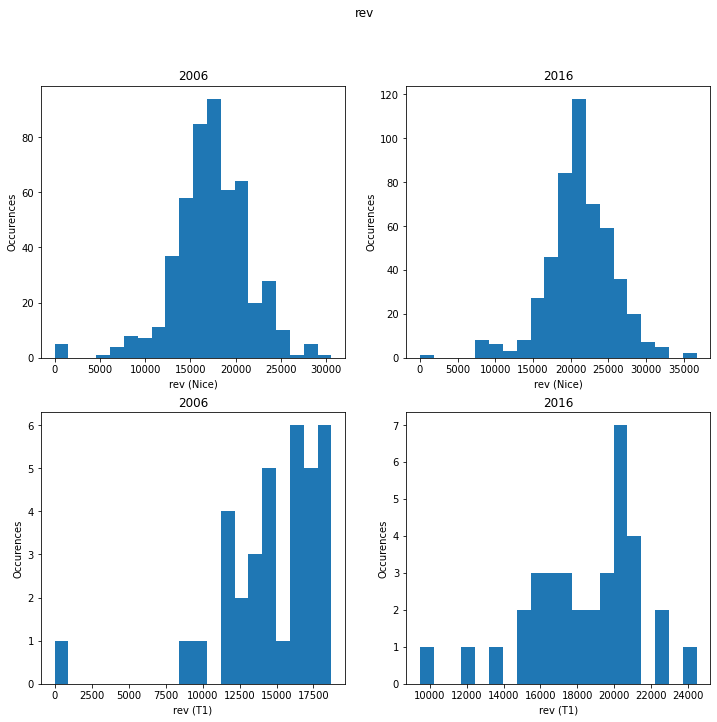

In [22]:
'''feature_label = 'rev'
draw_hist(bd_gent_2006, bd_gent_2016, bd_gent_2006_T1, bd_gent_2016_T1, feature_label)'''

## Pearson correlation 🚀

In [43]:
corr = bd_gent_2006_T1_no_tx.corr()
corr.shape

(26, 26)

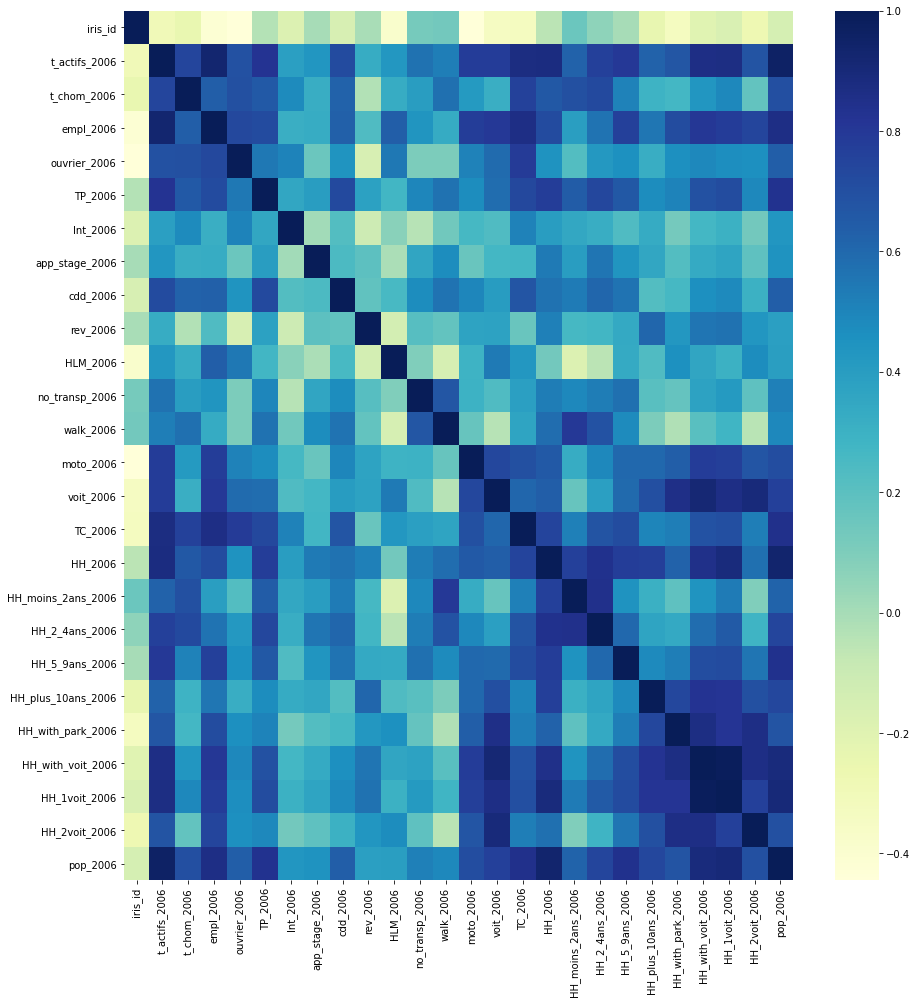

In [39]:
fig, ax = plt.subplots(figsize=(15,16))
ax = sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [41]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.reset_index(inplace=True, drop=True)
corr_df.head()

,feature_1,feature_2,correlation
0,HH_1voit_2006,HH_with_voit_2006,0.985650
1,HH_with_voit_2006,HH_1voit_2006,0.985650
2,pop_2006,t_actifs_2006,0.955644
3,t_actifs_2006,pop_2006,0.955644
4,pop_2006,HH_2006,0.934751


## Pairplots

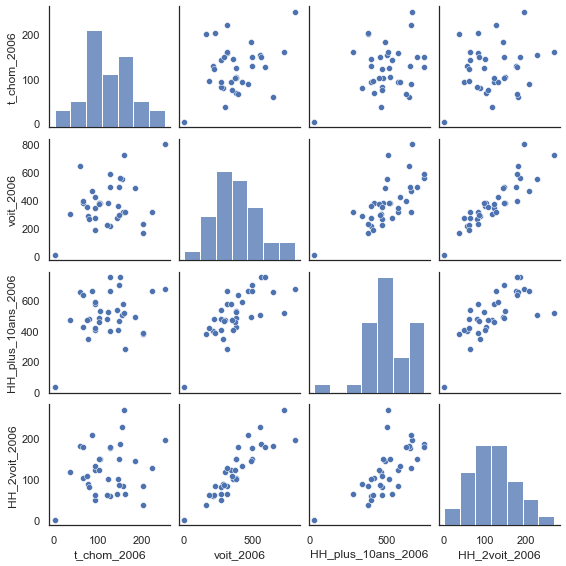

In [40]:
sns.set(style='white')
sns.pairplot(bd_gent_2006_T1_no_tx[['t_chom_2006', 'voit_2006', 'HH_plus_10ans_2006', 'HH_2voit_2006']], height=2)
plt.show()

## Time for a bit of modelling

### Model parameters - Chage these to dig into e.g. Nice or just T1 or 2006 vs 2016


In [110]:
df_X = bd_gent_2016_no_tx
df_X.head()

,iris_id,t_actifs_2016,t_chom_2016,empl_2016,ouvrier_2016,TP_2016,Int_2016,app_stage_2016,CDD_2016,rev_2016,...,HH_2016,HH_moins_2ans_2016,HH_2_4ans_2016,HH_5_9ans_2016,HH_plus_10ans_2016,HH_with_park_2016,HH_with_voit_2016,HH_1voit_2016,HH_2voit_2016,pop_2016
0,60010000,36.365591,5.741935,4.784946,0.000000,6.698925,0.000000,0.000000,1.913978,NaN,...,45.935484,10.526882,10.526882,7.655914,17.225806,26.795699,40.193548,26.795699,13.397849,89.000000
1,60020000,31.146667,5.840000,4.866667,4.866667,6.813333,0.000000,0.973333,5.840000,NaN,...,37.960000,4.866667,7.786667,3.893333,21.413333,10.706667,28.226667,20.440000,7.786667,73.000000
2,60030000,269.050007,43.467660,95.085507,67.918219,42.562084,1.811153,3.622305,18.111525,15670.0,...,269.955583,30.789593,63.390338,65.295349,110.480303,187.548144,252.749634,140.458178,112.291456,589.000000
3,60040101,604.818909,96.239886,183.644202,102.723350,53.893508,3.788325,9.724609,40.522157,21136.0,...,630.544586,82.365854,231.907761,204.006484,112.264488,454.339815,484.418553,336.213056,148.205497,1302.147404
4,60040102,1265.456645,91.799759,341.483429,157.342286,152.709438,1.142076,17.151069,81.025567,24220.0,...,1027.191612,78.869138,179.118869,107.473478,661.730126,746.399126,961.909377,495.230991,466.678386,2498.174757


In [170]:
df_X.columns

Index(['iris_id', 't_actifs_2016', 't_chom_2016', 'empl_2016', 'ouvrier_2016',
       'TP_2016', 'Int_2016', 'app_stage_2016', 'CDD_2016', 'rev_2016',
       'HLM_2016', 'no_transp_2016', 'walk_2016', 'moto_2016', 'voit_2016',
       'TC_2016', 'HH_2016', 'HH_moins_2ans_2016', 'HH_2_4ans_2016',
       'HH_5_9ans_2016', 'HH_plus_10ans_2016', 'HH_with_park_2016',
       'HH_with_voit_2016', 'HH_1voit_2016', 'HH_2voit_2016', 'pop_2016'],
      dtype='object')

In [172]:
list=['t_actifs_2016', 't_chom_2016', 'empl_2016', 'ouvrier_2016',
       'TP_2016', 'Int_2016', 'app_stage_2016', 'CDD_2016', 'rev_2016',
       'HLM_2016', 'no_transp_2016', 'walk_2016', 'moto_2016', 'voit_2016',
       'TC_2016', 'HH_2016', 'HH_moins_2ans_2016', 'HH_2_4ans_2016',
       'HH_5_9ans_2016', 'HH_plus_10ans_2016', 'HH_with_park_2016',
       'HH_with_voit_2016', 'HH_1voit_2016', 'HH_2voit_2016', 'pop_2016']
len(list)

25

In [216]:
bd_gent_2006_no_tx.columns

Index(['iris_id', 't_actifs_2006', 't_chom_2006', 'empl_2006', 'ouvrier_2006',
       'TP_2006', 'Int_2006', 'app_stage_2006', 'cdd_2006', 'rev_2006',
       'HLM_2006', 'no_transp_2006', 'walk_2006', 'moto_2006', 'voit_2006',
       'TC_2006', 'HH_2006', 'HH_moins_2ans_2006', 'HH_2_4ans_2006',
       'HH_5_9ans_2006', 'HH_plus_10ans_2006', 'HH_with_park_2006',
       'HH_with_voit_2006', 'HH_1voit_2006', 'HH_2voit_2006', 'pop_2006'],
      dtype='object')

In [209]:
bd_gent_2006_2016_no_tx=bd_gent_2006_no_tx.merge(bd_gent_2016_no_tx,on='iris_id')

In [215]:
for l in range (0, 25):
    bd_gent_2006_2016_no_tx[f'diff_{list[l]}']=(bd_gent_2016_no_tx).iloc[:,l+1]-(bd_gent_2006_no_tx).iloc[:,l+1]
bd_gent_2006_2016_no_tx.shape

(500, 77)

In [222]:
bd_gent_2006_2016_diff=bd_gent_2006_2016_no_tx.drop(columns=['iris_id','t_actifs_2016', 't_chom_2016', 'empl_2016', 'ouvrier_2016',
       'TP_2016', 'Int_2016', 'app_stage_2016', 'CDD_2016', 'rev_2016',
       'HLM_2016', 'no_transp_2016', 'walk_2016', 'moto_2016', 'voit_2016',
       'TC_2016', 'HH_2016', 'HH_moins_2ans_2016', 'HH_2_4ans_2016',
       'HH_5_9ans_2016', 'HH_plus_10ans_2016', 'HH_with_park_2016',
       'HH_with_voit_2016', 'HH_1voit_2016', 'HH_2voit_2016', 'pop_2016','t_actifs_2006', 't_chom_2006', 'empl_2006', 'ouvrier_2006',
       'TP_2006', 'Int_2006', 'app_stage_2006', 'cdd_2006', 'rev_2006',
       'HLM_2006', 'no_transp_2006', 'walk_2006', 'moto_2006', 'voit_2006',
       'TC_2006', 'HH_2006', 'HH_moins_2ans_2006', 'HH_2_4ans_2006',
       'HH_5_9ans_2006', 'HH_plus_10ans_2006', 'HH_with_park_2006',
       'HH_with_voit_2006', 'HH_1voit_2006', 'HH_2voit_2006', 'pop_2006'])
bd_gent_2006_2016_diff.columns

Index(['difft_actifs_2016', 'diff_t_actifs_2016', 'diff_t_chom_2016',
       'diff_empl_2016', 'diff_ouvrier_2016', 'diff_TP_2016', 'diff_Int_2016',
       'diff_app_stage_2016', 'diff_CDD_2016', 'diff_rev_2016',
       'diff_HLM_2016', 'diff_no_transp_2016', 'diff_walk_2016',
       'diff_moto_2016', 'diff_voit_2016', 'diff_TC_2016', 'diff_HH_2016',
       'diff_HH_moins_2ans_2016', 'diff_HH_2_4ans_2016', 'diff_HH_5_9ans_2016',
       'diff_HH_plus_10ans_2016', 'diff_HH_with_park_2016',
       'diff_HH_with_voit_2016', 'diff_HH_1voit_2016', 'diff_HH_2voit_2016',
       'diff_pop_2016'],
      dtype='object')

In [223]:
bd_gent_2006_2016_diff.head()

,difft_actifs_2016,diff_t_actifs_2016,diff_t_chom_2016,diff_empl_2016,diff_ouvrier_2016,diff_TP_2016,diff_Int_2016,diff_app_stage_2016,diff_CDD_2016,diff_rev_2016,...,diff_HH_2016,diff_HH_moins_2ans_2016,diff_HH_2_4ans_2016,diff_HH_5_9ans_2016,diff_HH_plus_10ans_2016,diff_HH_with_park_2016,diff_HH_with_voit_2016,diff_HH_1voit_2016,diff_HH_2voit_2016,diff_pop_2016
0,3.987813,3.987813,3.653046,-3.570610,0.000000,0.432258,0.000000,0.0,-6.441578,NaN,...,-2.108960,6.349104,1.126882,0.344803,-9.929750,0.684588,0.504659,2.773477,-2.268818,-5.000000
1,19.138116,19.138116,2.837862,0.863817,0.863817,5.812620,0.000000,0.0,5.840000,NaN,...,21.948599,1.864529,3.783817,1.891908,14.408345,2.700966,12.215266,7.430737,4.784529,46.981473
2,37.028029,37.028029,18.742385,43.803456,-12.667862,9.595051,0.895402,0.0,-10.276753,1804.0,...,48.091114,-25.155462,11.108287,16.760550,45.377739,52.017008,51.947436,10.337299,41.610137,85.000000
3,46.459057,46.459057,16.686888,-5.862462,-39.555487,-50.297554,3.788325,0.0,-3.396323,1028.0,...,275.087094,62.436703,155.139821,149.815364,-92.304793,184.997019,142.194898,163.983100,-21.788202,253.000664
4,-57.220005,-57.220005,-3.906958,-112.373557,-30.975990,-51.209754,-10.028201,0.0,-0.097325,6042.0,...,27.345368,11.763434,31.078812,-110.507085,95.010207,57.578477,33.006351,46.381806,-13.375454,-79.233650


In [224]:
scaler = StandardScaler()
diff_scaled = scaler.fit_transform(bd_gent_2006_2016_diff)
diff_scaled=pd.DataFrame(diff_scaled)
diff_scaled

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.125067,-0.125067,-0.541826,0.027617,0.196703,-0.314740,0.134377,0.0,-0.198605,NaN,...,-0.257810,0.134563,-0.107384,0.514517,-0.811058,-0.328985,-0.229381,-0.154963,-0.253306,-0.075085
1,-0.042272,-0.042272,-0.558658,0.083022,0.212931,-0.173951,0.134377,0.0,0.253477,NaN,...,-0.110726,0.051651,-0.065686,0.539043,-0.548073,-0.314400,-0.144788,-0.109830,-0.139966,0.074836
2,0.055495,0.055495,-0.230263,0.619525,-0.041282,-0.074976,0.226982,0.0,-0.339777,-0.978672,...,0.049105,-0.447903,0.049264,0.774755,-0.213433,0.042330,0.142221,-0.081663,0.451785,0.184487
3,0.107034,0.107034,-0.272705,-0.001019,-0.546408,-1.642190,0.526179,0.0,-0.086510,-1.333298,...,1.436920,1.171527,2.309691,2.884069,-1.701161,1.004248,0.794133,1.407289,-0.566964,0.669023
4,-0.459562,-0.459562,-0.697924,-1.331807,-0.385229,-1.666059,-0.902774,0.0,0.034926,0.958058,...,-0.077731,0.234665,0.362681,-1.242815,0.322870,0.082559,0.005399,0.267637,-0.431779,-0.289185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2.868404,2.868404,1.675685,1.495984,0.712155,1.069410,-0.652707,0.0,-1.131575,-0.431196,...,3.341256,0.843935,2.821086,3.126019,1.338976,3.689742,3.601961,3.702071,1.873958,2.865579
496,-1.124744,-1.124744,-0.766457,-0.986875,0.852508,1.612423,0.565708,0.0,0.643966,0.017570,...,-0.249922,-0.594374,-2.276450,-0.444974,1.776335,-0.613457,-0.339619,0.408616,-1.433042,-0.239329
497,0.178391,0.178391,-0.439960,0.906865,0.377169,-0.303824,-1.245984,0.0,-0.057417,0.459024,...,-0.086281,0.319919,0.097183,0.161830,-0.516686,0.417012,0.257529,0.536199,-0.316231,0.099525
498,-0.064886,-0.064886,-0.142352,-0.252624,0.516074,-0.142881,0.134377,0.0,-0.255970,2.762719,...,0.103572,0.183573,-0.219233,0.604168,-0.185099,-0.319470,0.135377,0.234865,-0.088297,0.135457


In [221]:
scaler = StandardScaler()
df_X_scaled = scaler.fit_transform(df_X)
df_X_scaled=pd.DataFrame(df_X_scaled)
df_X_scaled

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-1.783048,-1.633577,-1.455388,-1.566457,-1.400824,-1.605823,-0.997035,-1.117092,-1.529894,NaN,...,-1.754756,-1.259467,-1.502372,-1.614026,-1.794446,-1.356845,-1.605312,-1.589407,-1.098958,-1.741741
1,-1.759536,-1.642678,-1.454283,-1.566042,-1.358129,-1.604432,-0.997035,-1.044585,-1.436114,NaN,...,-1.769157,-1.320177,-1.523397,-1.649279,-1.778993,-1.391792,-1.631001,-1.609863,-1.123234,-1.755149
2,-1.736024,-1.227800,-1.030307,-1.108212,-0.804985,-1.169880,-0.822694,-0.847253,-1.142984,-1.261864,...,-1.350237,-1.042137,-1.096766,-1.073981,-1.450319,-1.007677,-1.149036,-1.223572,-0.671111,-1.322732
3,-1.712274,-0.642255,-0.435686,-0.658807,-0.499643,-1.032139,-0.632371,-0.392669,-0.607662,-0.042039,...,-0.699113,-0.488949,0.196221,0.225655,-1.443735,-0.428181,-0.651733,-0.593515,-0.515735,-0.725103
4,-1.712272,0.509827,-0.485716,0.142173,-0.020477,0.169040,-0.887099,0.160557,0.359841,0.646205,...,0.017123,-0.526453,-0.208813,-0.678799,0.583899,0.206198,0.373256,-0.081699,0.862085,0.277188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.979134,1.131415,1.104691,1.003586,0.405976,0.701420,0.034093,0.537152,0.417770,0.182913,...,0.966968,1.211753,2.140655,1.842070,-0.195865,1.495256,1.295153,1.431854,0.685632,0.611426
496,1.979137,0.860286,-0.208403,0.194083,-0.145920,1.549201,-0.595580,0.562356,0.164701,1.914681,...,0.889801,0.391888,0.461421,1.192207,0.992095,1.530767,1.417775,0.767155,1.826233,0.873858
497,1.979139,0.523696,0.235779,0.412739,0.326225,0.375304,-0.061731,1.027932,0.164456,0.890795,...,0.154589,0.565121,0.280401,0.172123,-0.081164,0.725273,0.561014,0.466315,0.503875,0.141841
498,2.002400,-1.222656,-1.125718,-1.134019,-0.830586,-1.237492,-0.997035,-0.893611,-0.906779,0.672539,...,-1.265288,-0.911173,-1.260888,-1.207919,-1.190088,-1.219560,-1.131326,-1.131707,-0.758899,-1.231388


In [72]:
pd.DataFrame(df_X_scaled).isna().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9     27
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
dtype: int64

In [225]:
diff_scaled.isna().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9     27
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
dtype: int64

In [226]:
diff_scaled.iloc[:,9]=diff_scaled.iloc[:,9].replace(np.nan,diff_scaled.iloc[:,9].mean())

In [227]:
diff_scaled.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64

In [85]:
df_X_scaled.iloc[:,9].mean()

-5.858597609861291e-16

In [86]:
df_X_scaled.iloc[:,9].isna().sum()

27

In [87]:
df_X_scaled.iloc[:,9]=df_X_scaled.iloc[:,9].replace(np.nan,df_X_scaled.iloc[:,9].mean())

In [88]:
df_X_scaled.iloc[:,9].isna().sum()

0

In [90]:
'''simp_imputer = SimpleImputer(strategy="mean")

simp_imputer.fit(pd.DataFrame(df_X_scaled).loc[:,9])

simp_imputer.transform(pd.DataFrame(df_X_scaled.iloc[:,9]))'''

'simp_imputer = SimpleImputer(strategy="mean")\n\nsimp_imputer.fit(pd.DataFrame(df_X_scaled).loc[:,9])\n\nsimp_imputer.transform(pd.DataFrame(df_X_scaled.iloc[:,9]))'

In [91]:
pca = PCA()

In [92]:
pca.fit(df_X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [273]:
pca.fit(diff_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [276]:
Wt = pd.DataFrame(pca.components_)
Wt.shape

(26, 26)

In [98]:
df_X_scaled_PCA = pd.DataFrame(pca.transform(df_X_scaled))
df_X_scaled_PCA

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-6.722256,-0.060661,-0.125558,-1.716795,0.642160,0.360525,0.303363,-0.103530,-0.229379,0.166641,...,0.025078,0.009713,0.096144,-0.106578,0.023599,0.000663,0.001254,-0.014175,6.388396e-11,-2.555100e-11
1,-6.798017,-0.014873,-0.019990,-1.739856,0.511067,0.280775,0.556229,0.032115,-0.141062,0.138010,...,0.015300,-0.026118,0.057216,-0.061114,0.016452,0.002442,-0.028543,-0.006302,4.152456e-11,-3.284137e-12
2,-5.064353,0.349898,0.514524,-1.719568,0.899372,0.150864,0.188724,0.613073,0.108326,-0.290581,...,0.023871,0.002482,-0.005834,-0.108415,0.040844,-0.042029,0.111053,-0.031054,1.092473e-10,-8.284139e-11
3,-2.567819,0.130999,-0.031975,-1.733443,0.832201,-0.403914,0.193757,0.176871,0.231767,0.458412,...,0.133511,0.029561,-0.372477,-0.046484,-0.170788,0.012113,0.054476,0.010015,-1.677135e-10,-1.168887e-12
4,0.488527,-1.779749,0.281080,-1.615716,0.117065,0.669835,0.593089,-0.788402,0.179822,-0.479221,...,-0.257848,-0.045771,-0.306044,0.183609,0.264765,-0.020703,-0.139510,0.018329,8.049293e-11,2.079419e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4.067446,-0.777087,0.096021,1.457062,-0.326745,-1.855435,-0.343065,0.894721,1.141293,1.028284,...,-0.284310,-0.066576,0.139697,-0.082807,0.085158,-0.169401,0.088698,-0.010443,1.478593e-10,-5.221669e-10
496,3.299378,-3.735058,-0.326263,1.857722,-0.469361,-0.246041,-0.552926,-0.600258,-0.026645,0.246070,...,0.523333,-0.366292,0.204129,0.152993,-0.059992,-0.043883,0.080613,-0.027245,1.304663e-10,1.422554e-10
497,1.599205,-1.790401,0.097331,2.075348,0.175838,0.274731,-0.454189,0.147785,0.240872,1.033191,...,0.003573,-0.039519,0.404429,-0.073241,0.201290,-0.034418,-0.105831,0.022448,5.350978e-10,6.222343e-10
498,-4.968361,-0.348743,-0.181016,1.886685,-0.445222,0.255930,-0.266697,-0.088013,0.583374,0.055070,...,0.144197,0.064481,0.058082,0.047307,0.001960,-0.006130,0.061412,-0.021601,-4.277175e-11,1.853994e-11


In [274]:
diff_scaled_PCA = pd.DataFrame(pca.transform(diff_scaled))
diff_scaled_PCA

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.593810,-0.156313,-0.789287,-0.794910,0.371665,-0.153273,0.235618,-0.043136,-0.231143,-0.185681,...,-0.061049,-0.061107,0.024544,-0.059184,0.078003,0.007354,4.630398e-09,2.835072e-10,4.160614e-17,7.266042e-17
1,-0.222338,-0.268723,-0.640305,-0.846455,0.352283,-0.199372,0.065256,0.237648,-0.118001,-0.187260,...,0.012121,-0.218898,0.048077,0.020097,0.104503,0.009032,-8.734862e-11,-6.393661e-11,1.312253e-17,1.858322e-17
2,0.384382,-0.520506,-0.923689,-0.355909,-0.232508,-0.729997,-0.379639,0.822254,-0.686789,0.411195,...,-0.117600,-0.199565,-0.273843,-0.010098,-0.009063,0.097393,-1.397766e-10,-5.998298e-10,2.684521e-16,9.061706e-17
3,2.044333,0.384373,-4.089378,-1.125927,-2.337822,0.914657,1.268006,0.302083,-0.976970,0.204305,...,0.677501,0.280813,-0.228726,0.337061,-0.270314,0.028004,-1.792230e-09,-8.771235e-10,9.256662e-17,4.639082e-16
4,-1.380738,-1.107844,0.470580,0.328407,-0.007023,1.887833,1.177488,-0.810082,0.172419,0.485056,...,0.755023,0.274366,0.311894,-0.016457,0.083117,0.060728,-3.093366e-09,-4.945108e-09,-8.959084e-17,1.093701e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10.136676,-2.052161,-1.950476,0.696414,-2.415706,0.299706,0.773512,-0.616249,-0.325977,1.512312,...,-0.434453,0.166980,0.706296,0.254054,-0.245796,-0.036373,7.696272e-10,2.419217e-09,-2.509231e-16,-5.656337e-16
496,-1.612457,-0.662557,1.742939,1.602645,2.356973,-0.723521,1.577075,0.544681,0.034070,-0.766159,...,-0.865839,-0.563141,0.349102,0.018010,0.243461,0.167688,4.093919e-09,9.851712e-10,-3.338535e-16,4.182805e-16
497,0.634314,-0.655243,0.210586,-0.957605,0.492674,0.133266,1.310558,-1.398222,-0.248663,0.768486,...,-0.678655,0.196087,-0.224462,-0.101947,0.188413,-0.009121,2.030748e-09,-3.405152e-09,-3.342974e-16,-6.631831e-18
498,0.055587,-1.047654,-0.365677,-0.516658,0.920032,0.583790,0.111201,-1.336290,1.818676,-1.020559,...,-0.260231,-0.288453,0.294944,-0.035473,-0.029096,0.192106,-5.309683e-10,-7.548215e-10,-4.199979e-16,-5.798703e-17


<AxesSubplot:>

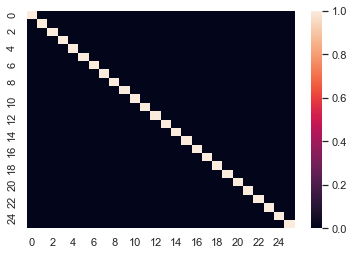

In [97]:
sns.heatmap(df_X_scaled_PCA.corr())

In [99]:
numpy_X_scaled_PCA = df_X_scaled_PCA.to_numpy(copy=True) # What was the problem? Wrong datatype expected=numpy, passed:pd.DataFrame

df = pd.DataFrame()
df["vif_index"] = [vif(numpy_X_scaled_PCA, i) for i in range(numpy_X_scaled_PCA.shape[1])]

In [100]:
df

,vif_index
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


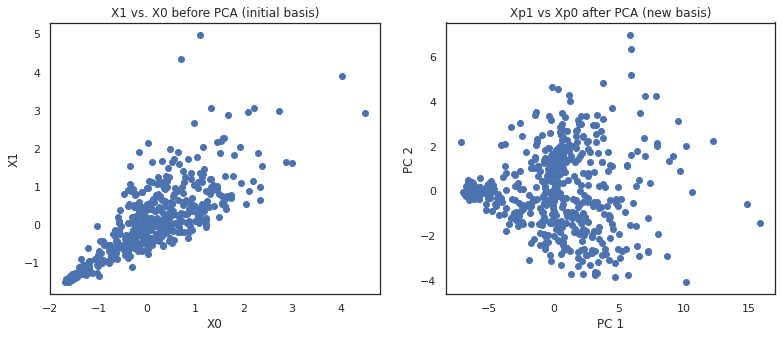

In [32]:
numpy_X_scaled = df_X_scaled.to_numpy()

plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial basis)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(numpy_X_scaled[:,0], numpy_X_scaled[:,1])

plt.subplot(1,2,2)
plt.title('Xp1 vs Xp0 after PCA (new basis)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(numpy_X_scaled_PCA[:,0], numpy_X_scaled_PCA[:,1])

In [103]:
#'Rank' PC per order of 'importance'
df_Xp = df_X_scaled_PCA # sample: pd.DataFrame(Xp)
df_Xp.std()**2 / ((df_Xp.std()**2).sum())

0     6.111018e-01
1     1.189930e-01
2     6.021483e-02
3     4.052593e-02
4     3.142530e-02
5     2.581965e-02
6     2.185565e-02
7     1.826612e-02
8     1.370015e-02
9     1.271335e-02
10    9.809457e-03
11    7.969696e-03
12    5.389918e-03
13    4.563852e-03
14    4.390194e-03
15    3.416010e-03
16    2.897128e-03
17    2.054332e-03
18    1.795822e-03
19    1.358833e-03
20    8.150142e-04
21    4.642829e-04
22    4.259461e-04
23    3.366866e-05
24    4.218980e-21
25    3.130951e-21
dtype: float64

In [230]:
#'Rank' PC per order of 'importance'
diff_Xp = diff_scaled_PCA # sample: pd.DataFrame(Xp)
diff_Xp.std()**2 / ((diff_Xp.std()**2).sum())

0     4.281309e-01
1     6.932439e-02
2     5.271681e-02
3     5.104195e-02
4     4.634216e-02
5     4.273799e-02
6     3.949759e-02
7     3.716329e-02
8     3.330553e-02
9     3.156889e-02
10    2.634324e-02
11    2.474913e-02
12    2.376349e-02
13    2.025428e-02
14    1.814526e-02
15    1.662333e-02
16    1.260304e-02
17    1.050495e-02
18    6.995085e-03
19    4.415786e-03
20    2.884584e-03
21    8.882996e-04
22    3.686331e-19
23    2.763519e-19
24    4.534964e-33
25    9.172138e-33
dtype: float64

In [231]:
pca.explained_variance_ratio_

array([4.28130908e-01, 6.93243923e-02, 5.27168106e-02, 5.10419475e-02,
       4.63421617e-02, 4.27379862e-02, 3.94975854e-02, 3.71632937e-02,
       3.33055277e-02, 3.15688922e-02, 2.63432437e-02, 2.47491303e-02,
       2.37634925e-02, 2.02542843e-02, 1.81452631e-02, 1.66233337e-02,
       1.26030385e-02, 1.05049532e-02, 6.99508526e-03, 4.41578592e-03,
       2.88458443e-03, 8.88299562e-04, 3.68633079e-19, 2.76351930e-19,
       8.44592933e-32, 2.15971912e-34])

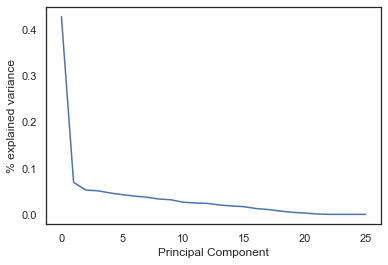

In [232]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); 
plt.ylabel('% explained variance');

In [107]:
eig_vals, eig_vecs = np.linalg.eig(np.dot(df_X_scaled.T,df_X_scaled))

In [234]:
eig_vals2, eig_vecs2 = np.linalg.eig(np.dot(diff_scaled.T,diff_scaled))

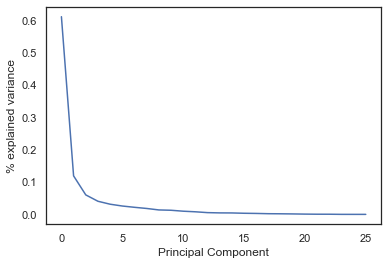

In [108]:
# Compute the share of explained variance per component
tot = sum(eig_vals)
share_of_variances = [(i / tot) for i in sorted(eig_vals, reverse=True)]
plt.plot(share_of_variances); 
plt.xlabel('Principal Component'); 
plt.ylabel('% explained variance');

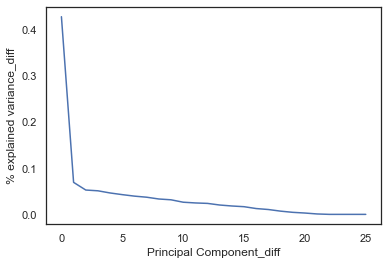

In [236]:
# Compute the share of explained variance per component
tot = sum(eig_vals2)
share_of_variances = [(i / tot) for i in sorted(eig_vals2, reverse=True)]
plt.plot(share_of_variances); 
plt.xlabel('Principal Component_diff'); 
plt.ylabel('% explained variance_diff');

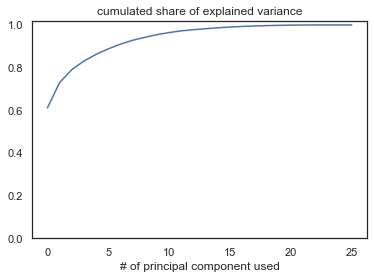

In [109]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

In [131]:
#y_pred = df_X_scaled[24]

# model = LogisticRegression()
from sklearn.linear_model import LinearRegression
model = LinearRegression()

print("accuracy all features")
cross_val_score(model, df_X_scaled, y_pred, cv=10).mean()

accuracy all features


1.0

In [123]:
#
# !--- HERE!!!! Type the number of components that PCA found or you want to use ---!
#
n_components = 2

In [126]:
df_X_scaled.isna().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9     27
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
dtype: int64

In [127]:
df_X_scaled.iloc[:,9]=df_X_scaled.iloc[:,9].replace(np.nan,df_X_scaled.iloc[:,9].mean())

In [128]:
pca2 = PCA(n_components).fit(df_X_scaled)

# Print our 2 principal components
pd.DataFrame(pca2.components_)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.019637,0.245487,0.216057,0.236611,0.209051,0.233843,0.157943,0.180181,0.222210,0.027344,...,0.244529,0.198928,0.226043,0.233501,0.230599,0.216535,0.235023,0.230475,0.163874,0.246637
1,-0.035744,-0.072478,0.181119,0.074509,0.145728,-0.046683,0.249359,-0.002129,0.098333,-0.445055,...,-0.004247,0.109726,0.072693,0.023164,-0.090516,-0.241121,-0.180254,0.017461,-0.386759,-0.046526


In [129]:
X_pca_2 = pca2.fit_transform(df_X_scaled)

In [156]:
pd.DataFrame(X_pca_2)

,0,1
0,-6.758376,-0.134601
1,-6.833703,-0.087770
2,-5.101420,0.318347
3,-2.602087,0.067142
4,0.456624,-1.843673
...,...,...
495,4.107194,-0.702343
496,3.342883,-3.693500
497,1.640294,-1.730081
498,-4.928702,-0.305038


In [130]:
print(f"accuracy {n_components} features")
cross_val_score(model, X_pca_2, y_pred, cv=10).mean()

accuracy 2 features


0.7115205731011469

In [158]:
# Keep only 1 dimension
pca1 = PCA(n_components=1)

X__pca__1 = pca1.fit_transform(df__X__scaled) # Reminder: df__X_scaled == bd_gent_20??_no_tx__scaled

pd.DataFrame(X__pca__1)
print("accuracy 1 features")
cross_val_score(model, X__pca__1, y_pred, cv=10).mean()

accuracy 1 features


0.9370067005938465

# KMeans

In [113]:
#
# !--- HERE!!!! Type the number of components you want to use ---!
#
n_clusters = 2
# n_clusters = n_components

In [114]:
km = KMeans(n_clusters)
km.fit(df_X_scaled_PCA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [237]:
km2 = KMeans(n_clusters)
km2.fit(diff_scaled_PCA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [115]:
km.cluster_centers_

array([[-4.49255046e+00, -1.48181826e-03,  1.90515570e-01,
        -5.72195128e-02,  7.16895090e-02,  8.18131800e-02,
        -9.37788992e-03,  4.40245705e-02,  7.35655955e-02,
         5.47140843e-02, -3.08440824e-02,  1.43052856e-02,
         3.86034728e-02, -1.74349500e-02,  3.76811806e-03,
         3.75824810e-03, -1.07660682e-02, -6.23142047e-03,
         3.95885728e-04, -1.68697123e-03,  1.27311462e-03,
         6.79825273e-04,  1.13792509e-02, -1.65368928e-03,
         1.55965508e-11, -2.57537103e-13],
       [ 2.15323424e+00,  7.10220587e-04, -9.13121965e-02,
         2.74247369e-02, -3.43600605e-02, -3.92122342e-02,
         4.49472831e-03, -2.11005338e-02, -3.52592499e-02,
        -2.62239102e-02,  1.47832584e-02, -6.85637949e-03,
        -1.85022562e-02,  8.35639617e-03, -1.80602108e-03,
        -1.80129051e-03,  5.16006819e-03,  2.98665715e-03,
        -1.89744047e-04,  8.08548340e-04, -6.10191029e-04,
        -3.25833415e-04, -5.45396051e-03,  7.92596638e-04,
        -7.47

In [238]:
km2.cluster_centers_

array([[ 4.42926000e+00, -1.55078730e-01,  2.22202857e-01,
         1.70971383e-01, -1.64945852e-01,  1.10496368e-01,
        -1.40566650e-01,  4.67335816e-02, -7.26407081e-02,
        -4.66365114e-02,  7.16867513e-02, -6.91349976e-02,
        -1.19319381e-01, -2.77267269e-02,  1.14754624e-02,
        -1.43605709e-02, -4.23460702e-02,  1.95850743e-02,
        -1.57217190e-02,  5.85287166e-02, -3.72543951e-02,
        -7.81732171e-03,  3.29408639e-11,  1.61914084e-11,
        -3.94685930e-17, -4.87812558e-16],
       [-1.23475535e+00,  4.32316664e-02, -6.19440190e-02,
        -4.76620990e-02,  4.59823474e-02, -3.08033352e-02,
         3.91860994e-02, -1.30280317e-02,  2.02502230e-02,
         1.30009712e-02, -1.99842862e-02,  1.92729277e-02,
         3.32629477e-02,  7.72944561e-03, -3.19904195e-03,
         4.00333052e-03,  1.18049147e-02, -5.45977776e-03,
         4.38278101e-03, -1.63161895e-02,  1.03854963e-02,
         2.17925337e-03, -9.18300020e-12, -4.51369107e-12,
         1.10

In [116]:
km.labels_

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [239]:
km2.labels_

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [241]:
list_km=km.labels_.tolist()
#list

In [242]:
j=0
for i in range(0,500):
    if list_km[i]==1:
        j=j+1
j
        

338

In [243]:
list_km2=km2.labels_.tolist()
j=0
for i in range(0,500):
    if list_km2[i]==1:
        j=j+1
j

391

Text(0, 0.5, 'PC 2')

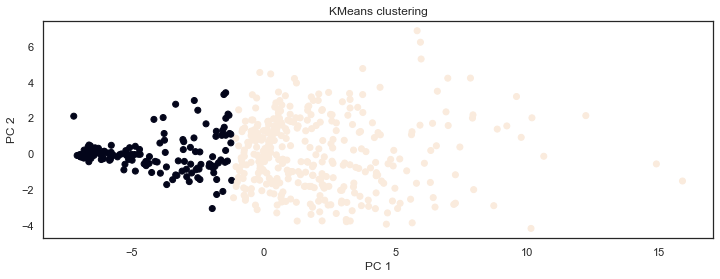

In [140]:
numpy_X_scaled_PCA = df_X_scaled_PCA.to_numpy()

plt.figure(figsize=(12,4))
plt.scatter(numpy_X_scaled_PCA[:,0], numpy_X_scaled_PCA[:,1], c=km.labels_)
plt.title('KMeans clustering'); 
plt.xlabel('PC 1');
plt.ylabel('PC 2')

Text(0, 0.5, 'PC 2_diff')

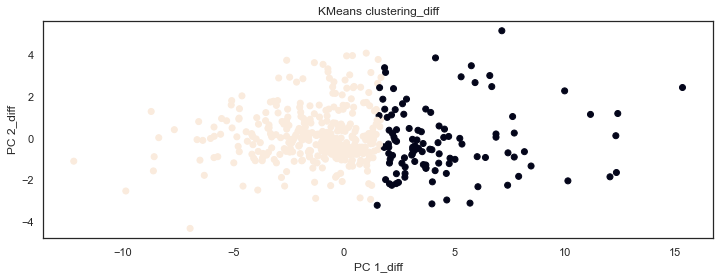

In [244]:
numpy_diff_scaled_PCA = diff_scaled_PCA.to_numpy()

plt.figure(figsize=(12,4))
plt.scatter(numpy_diff_scaled_PCA[:,0], numpy_diff_scaled_PCA[:,1], c=km2.labels_)
plt.title('KMeans clustering_diff'); 
plt.xlabel('PC 1_diff');
plt.ylabel('PC 2_diff')

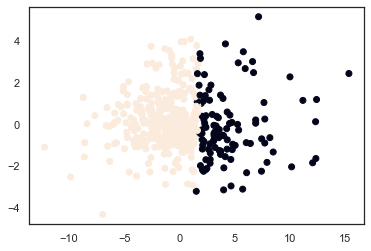

In [278]:
import plotly.express as px
fig = px.scatter(x=numpy_diff_scaled_PCA[:,0], y=numpy_diff_scaled_PCA[:,1])
fig.show()

Text(0.5, 1.0, 'True classification')

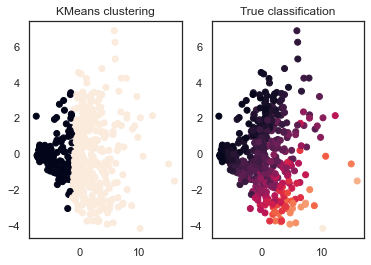

In [132]:
plt.subplot(1,2,1)
plt.scatter(numpy_X_scaled_PCA[:,0], numpy_X_scaled_PCA[:,1], c=km.labels_)
plt.title('KMeans clustering')

plt.subplot(1,2,2)
plt.scatter(numpy_X_scaled_PCA[:,0], numpy_X_scaled_PCA[:,1], c=y_pred)
plt.title('True classification')

In [ ]:
# ?????
km.predict(new_X)

Text(0.5, 0, 'k cluster number')

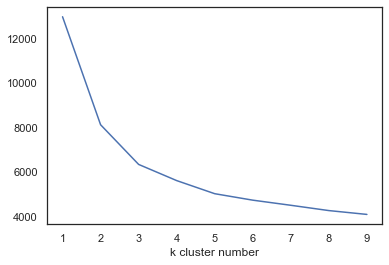

In [133]:
inertias = []
ks = range(1,10)
for k in ks:
    km_test = KMeans(n_clusters=k).fit(df_X_scaled_PCA)
    inertias.append(km_test.inertia_)
plt.plot(ks, inertias)
plt.xlabel('k cluster number')

In [139]:
len(km.labels_)

500

In [259]:
#pca_df.shape

In [258]:
#pca_df.loc[0,:].sort_values(ascending=False).index

In [263]:
cluster_500=pd.DataFrame(km2.labels_)
cluster_500.columns=['cluster_selection']
cluster_500

,cluster_selection
0,1
1,1
2,1
3,0
4,1
...,...
495,0
496,1
497,1
498,1


In [265]:
cluster_500['iris_id']=cluster_2006_2016['iris_id']
cluster_500

,cluster_selection,iris_id
0,1,60010000
1,1,60020000
2,1,60030000
3,0,60040101
4,1,60040102
...,...,...
495,0,61610105
496,1,61610106
497,1,61610107
498,1,61620000


In [249]:
bd_gent_2006_2016_no_tx.shape

(500, 77)

In [250]:
bd_gent_2006_2016_diff.columns

Index(['difft_actifs_2016', 'diff_t_actifs_2016', 'diff_t_chom_2016',
       'diff_empl_2016', 'diff_ouvrier_2016', 'diff_TP_2016', 'diff_Int_2016',
       'diff_app_stage_2016', 'diff_CDD_2016', 'diff_rev_2016',
       'diff_HLM_2016', 'diff_no_transp_2016', 'diff_walk_2016',
       'diff_moto_2016', 'diff_voit_2016', 'diff_TC_2016', 'diff_HH_2016',
       'diff_HH_moins_2ans_2016', 'diff_HH_2_4ans_2016', 'diff_HH_5_9ans_2016',
       'diff_HH_plus_10ans_2016', 'diff_HH_with_park_2016',
       'diff_HH_with_voit_2016', 'diff_HH_1voit_2016', 'diff_HH_2voit_2016',
       'diff_pop_2016'],
      dtype='object')

In [ ]:
391/109:500 Nice
28/7:35 T1

In [266]:
cluster_2006_2016=bd_gent_2006_2016_no_tx.drop(columns=['difft_actifs_2016', 'diff_t_actifs_2016', 'diff_t_chom_2016',
       'diff_empl_2016', 'diff_ouvrier_2016', 'diff_TP_2016', 'diff_Int_2016',
       'diff_app_stage_2016', 'diff_CDD_2016', 'diff_rev_2016',
       'diff_HLM_2016', 'diff_no_transp_2016', 'diff_walk_2016',
       'diff_moto_2016', 'diff_voit_2016', 'diff_TC_2016', 'diff_HH_2016',
       'diff_HH_moins_2ans_2016', 'diff_HH_2_4ans_2016', 'diff_HH_5_9ans_2016',
       'diff_HH_plus_10ans_2016', 'diff_HH_with_park_2016',
       'diff_HH_with_voit_2016', 'diff_HH_1voit_2016', 'diff_HH_2voit_2016',
       'diff_pop_2016'])
cluster_2006_2016.columns

Index(['iris_id', 't_actifs_2006', 't_chom_2006', 'empl_2006', 'ouvrier_2006',
       'TP_2006', 'Int_2006', 'app_stage_2006', 'cdd_2006', 'rev_2006',
       'HLM_2006', 'no_transp_2006', 'walk_2006', 'moto_2006', 'voit_2006',
       'TC_2006', 'HH_2006', 'HH_moins_2ans_2006', 'HH_2_4ans_2006',
       'HH_5_9ans_2006', 'HH_plus_10ans_2006', 'HH_with_park_2006',
       'HH_with_voit_2006', 'HH_1voit_2006', 'HH_2voit_2006', 'pop_2006',
       't_actifs_2016', 't_chom_2016', 'empl_2016', 'ouvrier_2016', 'TP_2016',
       'Int_2016', 'app_stage_2016', 'CDD_2016', 'rev_2016', 'HLM_2016',
       'no_transp_2016', 'walk_2016', 'moto_2016', 'voit_2016', 'TC_2016',
       'HH_2016', 'HH_moins_2ans_2016', 'HH_2_4ans_2016', 'HH_5_9ans_2016',
       'HH_plus_10ans_2016', 'HH_with_park_2016', 'HH_with_voit_2016',
       'HH_1voit_2016', 'HH_2voit_2016', 'pop_2016'],
      dtype='object')

In [267]:
cluster_2006_2016=cluster_2006_2016.merge(cluster_500,on='iris_id')
cluster_2006_2016

,iris_id,t_actifs_2006,t_chom_2006,empl_2006,ouvrier_2006,TP_2006,Int_2006,app_stage_2006,cdd_2006,rev_2006,...,HH_moins_2ans_2016,HH_2_4ans_2016,HH_5_9ans_2016,HH_plus_10ans_2016,HH_with_park_2016,HH_with_voit_2016,HH_1voit_2016,HH_2voit_2016,pop_2016,cluster_selection
0,60010000,32.377778,2.088889,8.355556,0.000000,6.266667,0.000000,0.000000,8.355556,17465.000000,...,10.526882,10.526882,7.655914,17.225806,26.795699,40.193548,26.795699,13.397849,89.000000,1
1,60020000,12.008551,3.002138,4.002850,4.002850,1.000713,0.000000,0.973333,0.000000,17310.473739,...,4.866667,7.786667,3.893333,21.413333,10.706667,28.226667,20.440000,7.786667,73.000000,1
2,60030000,232.021978,24.725275,51.282051,80.586081,32.967033,0.915751,3.622305,28.388278,13866.000000,...,30.789593,63.390338,65.295349,110.480303,187.548144,252.749634,140.458178,112.291456,589.000000,1
3,60040101,558.359852,79.552998,189.506664,142.278837,104.191062,0.000000,9.724609,43.918480,20108.000000,...,82.365854,231.907761,204.006484,112.264488,454.339815,484.418553,336.213056,148.205497,1302.147404,0
4,60040102,1322.676650,95.706717,453.856986,188.318276,203.919192,11.170277,17.151069,81.122892,18178.000000,...,78.869138,179.118869,107.473478,661.730126,746.399126,961.909377,495.230991,466.678386,2498.174757,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,61610105,1070.143140,121.898065,397.279573,178.515334,143.177166,18.322224,22.206448,115.237998,19142.000000,...,240.930181,485.329607,376.527727,450.423135,1339.863852,1391.374788,965.482255,425.892534,2897.019345,0
496,61610106,1645.359183,123.637177,436.479269,108.135220,192.168782,0.000000,22.544785,56.407980,25920.000000,...,164.490330,266.471832,307.167322,772.346545,1356.212620,1448.498466,758.964576,689.533890,3210.176694,1
497,61610107,1213.893134,147.245491,327.999513,187.255870,168.828448,23.063141,28.794645,75.451976,20366.000000,...,180.641683,242.879157,198.293015,481.505755,985.374381,1049.376242,665.495415,383.880827,2336.665940,1
498,61620000,257.000000,12.000000,116.000000,48.000000,30.000000,0.000000,3.000000,36.000000,14347.000000,...,43.000000,42.000000,51.000000,181.000000,90.000000,261.000000,169.000000,92.000000,698.000000,1


In [268]:
cluster1=cluster_2006_2016[cluster_2006_2016['cluster_selection']==1]
cluster1

,iris_id,t_actifs_2006,t_chom_2006,empl_2006,ouvrier_2006,TP_2006,Int_2006,app_stage_2006,cdd_2006,rev_2006,...,HH_moins_2ans_2016,HH_2_4ans_2016,HH_5_9ans_2016,HH_plus_10ans_2016,HH_with_park_2016,HH_with_voit_2016,HH_1voit_2016,HH_2voit_2016,pop_2016,cluster_selection
0,60010000,32.377778,2.088889,8.355556,0.000000,6.266667,0.000000,0.000000,8.355556,17465.000000,...,10.526882,10.526882,7.655914,17.225806,26.795699,40.193548,26.795699,13.397849,89.000000,1
1,60020000,12.008551,3.002138,4.002850,4.002850,1.000713,0.000000,0.973333,0.000000,17310.473739,...,4.866667,7.786667,3.893333,21.413333,10.706667,28.226667,20.440000,7.786667,73.000000,1
2,60030000,232.021978,24.725275,51.282051,80.586081,32.967033,0.915751,3.622305,28.388278,13866.000000,...,30.789593,63.390338,65.295349,110.480303,187.548144,252.749634,140.458178,112.291456,589.000000,1
4,60040102,1322.676650,95.706717,453.856986,188.318276,203.919192,11.170277,17.151069,81.122892,18178.000000,...,78.869138,179.118869,107.473478,661.730126,746.399126,961.909377,495.230991,466.678386,2498.174757,1
5,60040103,511.499066,35.060240,165.810711,47.430174,56.410613,0.000000,13.236030,40.904665,23662.000000,...,21.794762,82.463046,56.158199,271.613605,358.816527,382.754711,217.143203,165.611509,939.396540,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,61610104,856.304727,128.723690,280.896569,191.297024,137.785180,16.497255,6.522438,57.954167,18892.000000,...,105.055774,214.706035,135.193277,360.973751,470.942674,736.023928,481.535263,254.488665,1587.187406,1
496,61610106,1645.359183,123.637177,436.479269,108.135220,192.168782,0.000000,22.544785,56.407980,25920.000000,...,164.490330,266.471832,307.167322,772.346545,1356.212620,1448.498466,758.964576,689.533890,3210.176694,1
497,61610107,1213.893134,147.245491,327.999513,187.255870,168.828448,23.063141,28.794645,75.451976,20366.000000,...,180.641683,242.879157,198.293015,481.505755,985.374381,1049.376242,665.495415,383.880827,2336.665940,1
498,61620000,257.000000,12.000000,116.000000,48.000000,30.000000,0.000000,3.000000,36.000000,14347.000000,...,43.000000,42.000000,51.000000,181.000000,90.000000,261.000000,169.000000,92.000000,698.000000,1


Text(0.5, 1.0, 'cluster2_voit_2016')

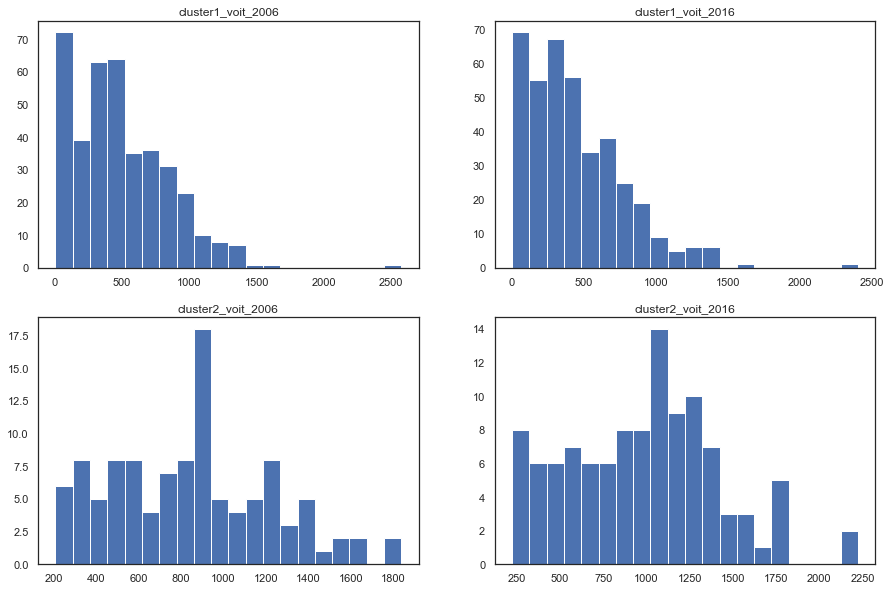

In [294]:
draw_feature1=['voit_2006']
draw_feature2=['voit_2016']
fig, axs = plt.subplots(2,2, figsize=(15,10), squeeze=True)
    
axs[0][0].hist(cluster1[draw_feature1[0]], bins=20)
axs[0][1].hist(cluster1[draw_feature2[0]], bins=20)
axs[0][0].set_title(f'cluster1_{draw_feature1[0]}')
axs[0][1].set_title(f'cluster1_{draw_feature2[0]}')

axs[1][0].hist(cluster2[draw_feature1[0]], bins=20)
axs[1][1].hist(cluster2[draw_feature2[0]], bins=20)
axs[1][0].set_title(f'cluster2_{draw_feature1[0]}')
axs[1][1].set_title(f'cluster2_{draw_feature2[0]}')

<AxesSubplot:>

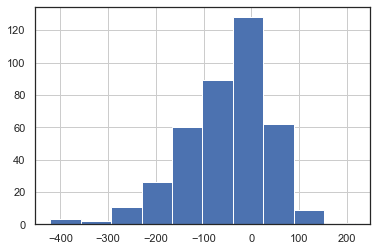

In [301]:
(cluster1['voit_2016']-cluster1['voit_2006']).hist()

<AxesSubplot:>

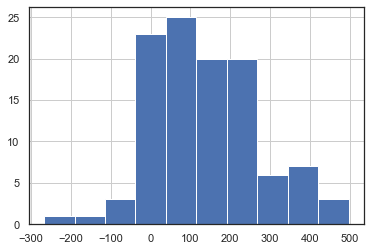

In [302]:
(cluster2['voit_2016']-cluster2['voit_2006']).hist()

<AxesSubplot:>

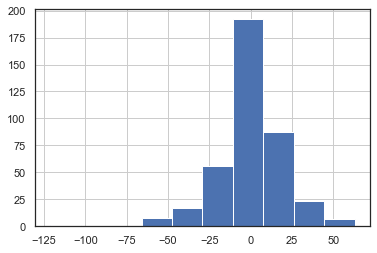

In [305]:
(cluster1['no_transp_2016']-cluster1['no_transp_2006']).hist()

<AxesSubplot:>

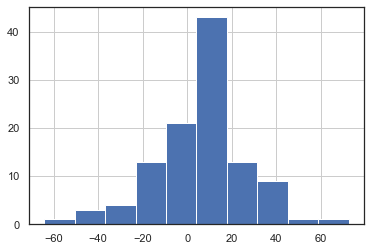

In [306]:
(cluster2['no_transp_2016']-cluster2['no_transp_2006']).hist()

<AxesSubplot:>

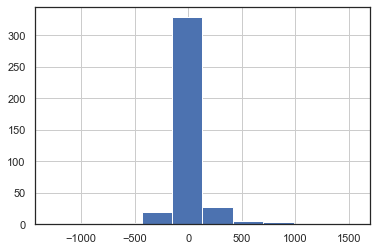

In [307]:
(cluster1['HLM_2016']-cluster1['HLM_2006']).hist()

<AxesSubplot:>

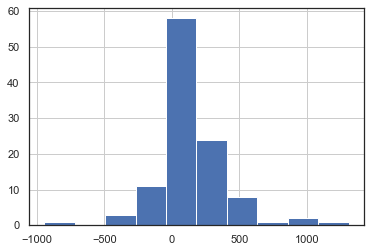

In [309]:
(cluster2['HLM_2016']-cluster2['HLM_2006']).hist()

<AxesSubplot:>

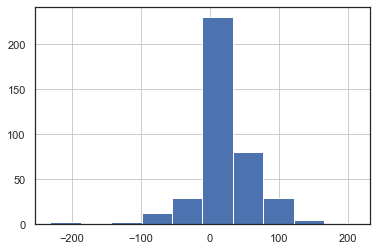

In [310]:
(cluster1['t_chom_2016']-cluster1['t_chom_2006']).hist()

<AxesSubplot:>

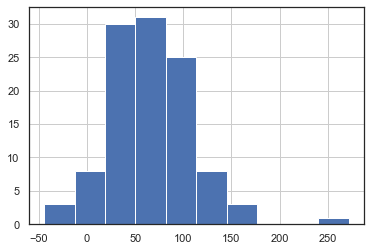

In [311]:
(cluster2['t_chom_2016']-cluster2['t_chom_2006']).hist()

Text(0.5, 1.0, "cluster2_['t_chom_2016']")

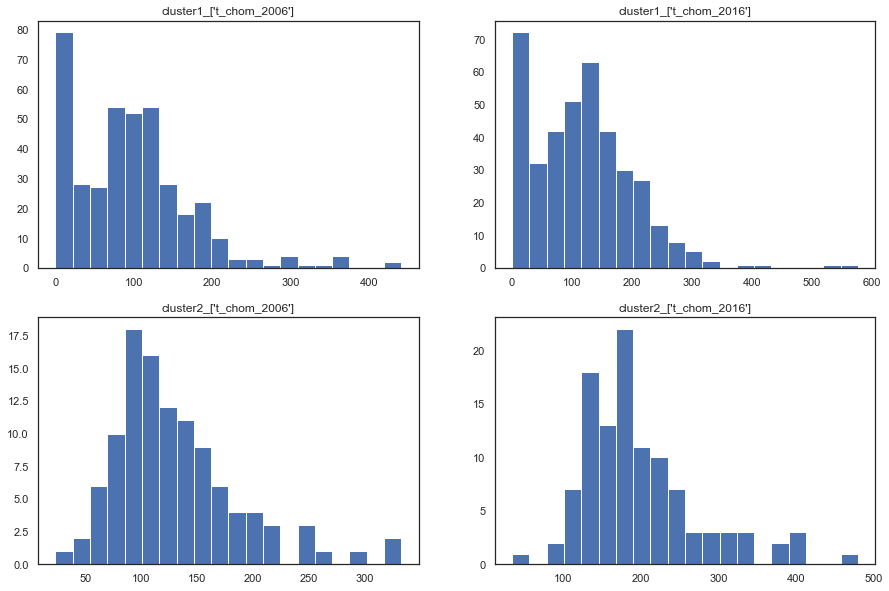

In [296]:
draw_feature1=['t_chom_2006']
draw_feature2=['t_chom_2016']
fig, axs = plt.subplots(2,2, figsize=(15,10), squeeze=True)
    
axs[0][0].hist(cluster1[draw_feature1], bins=20)
axs[0][1].hist(cluster1[draw_feature2], bins=20)
axs[0][0].set_title(f'cluster1_{draw_feature1}')
axs[0][1].set_title(f'cluster1_{draw_feature2}')

axs[1][0].hist(cluster2[draw_feature1], bins=20)
axs[1][1].hist(cluster2[draw_feature2], bins=20)
axs[1][0].set_title(f'cluster2_{draw_feature1}')
axs[1][1].set_title(f'cluster2_{draw_feature2}')

Text(0.5, 1.0, "cluster2_['HH_2voit_2016']")

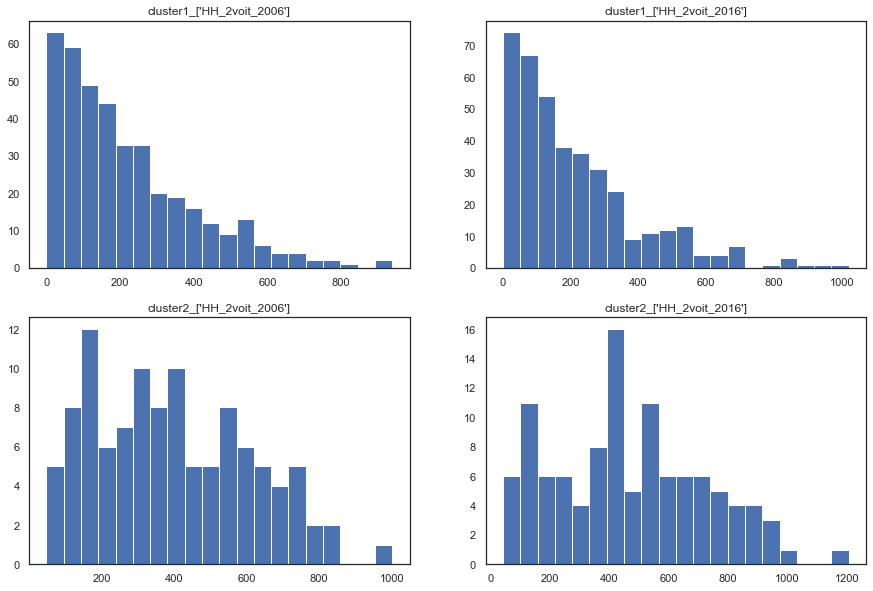

In [297]:
draw_feature1=['HH_2voit_2006']
draw_feature2=['HH_2voit_2016']
fig, axs = plt.subplots(2,2, figsize=(15,10), squeeze=True)
    
axs[0][0].hist(cluster1[draw_feature1], bins=20)
axs[0][1].hist(cluster1[draw_feature2], bins=20)
axs[0][0].set_title(f'cluster1_{draw_feature1}')
axs[0][1].set_title(f'cluster1_{draw_feature2}')

axs[1][0].hist(cluster2[draw_feature1], bins=20)
axs[1][1].hist(cluster2[draw_feature2], bins=20)
axs[1][0].set_title(f'cluster2_{draw_feature1}')
axs[1][1].set_title(f'cluster2_{draw_feature2}')

Text(0.5, 1.0, "cluster2_['HLM_2016']")

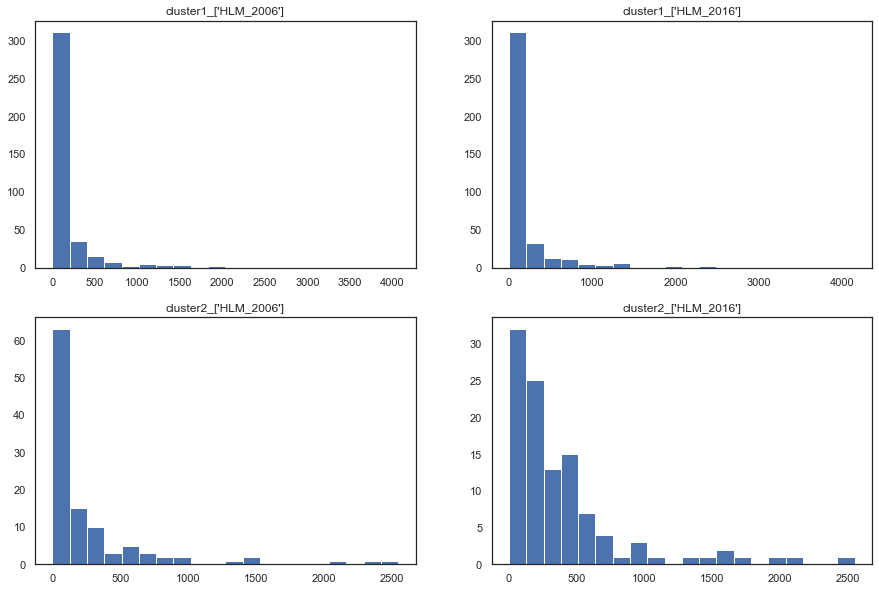

In [300]:
draw_feature1=['HLM_2006']
draw_feature2=['HLM_2016']
fig, axs = plt.subplots(2,2, figsize=(15,10), squeeze=True)
    
axs[0][0].hist(cluster1[draw_feature1], bins=20)
axs[0][1].hist(cluster1[draw_feature2], bins=20)
axs[0][0].set_title(f'cluster1_{draw_feature1}')
axs[0][1].set_title(f'cluster1_{draw_feature2}')

axs[1][0].hist(cluster2[draw_feature1], bins=20)
axs[1][1].hist(cluster2[draw_feature2], bins=20)
axs[1][0].set_title(f'cluster2_{draw_feature1}')
axs[1][1].set_title(f'cluster2_{draw_feature2}')

/Users/Dandan/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/Users/Dandan/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



Text(0.5, 1.0, "cluster2_['rev_2016']")

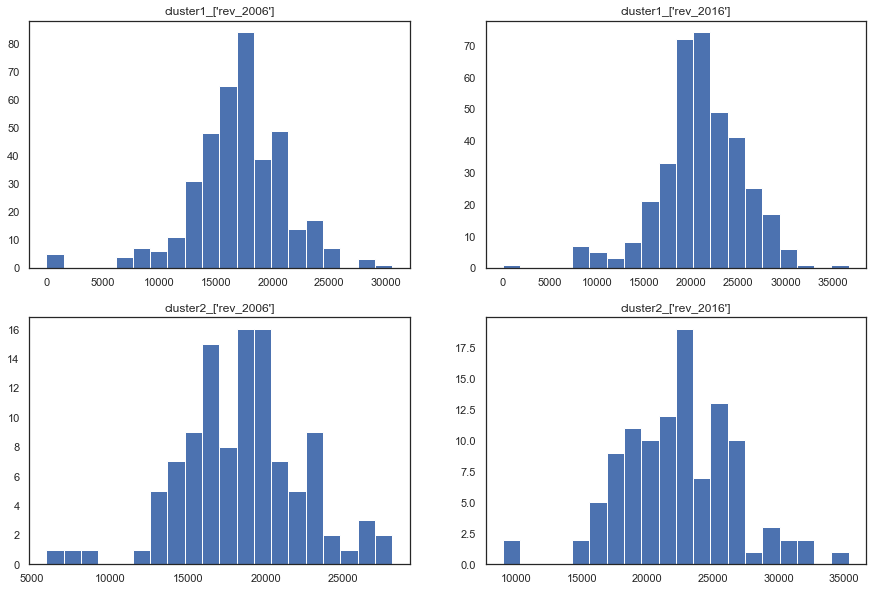

In [299]:
draw_feature1=['rev_2006']
draw_feature2=['rev_2016']
fig, axs = plt.subplots(2,2, figsize=(15,10), squeeze=True)
    
axs[0][0].hist(cluster1[draw_feature1], bins=20)
axs[0][1].hist(cluster1[draw_feature2], bins=20)
axs[0][0].set_title(f'cluster1_{draw_feature1}')
axs[0][1].set_title(f'cluster1_{draw_feature2}')

axs[1][0].hist(cluster2[draw_feature1], bins=20)
axs[1][1].hist(cluster2[draw_feature2], bins=20)
axs[1][0].set_title(f'cluster2_{draw_feature1}')
axs[1][1].set_title(f'cluster2_{draw_feature2}')

In [318]:
cluster2_T1=cluster2.merge(iris_T1,on='iris_id')
cluster2_T1

,iris_id,t_actifs_2006,t_chom_2006,empl_2006,ouvrier_2006,TP_2006,Int_2006,app_stage_2006,cdd_2006,rev_2006,...,HH_2_4ans_2016,HH_5_9ans_2016,HH_plus_10ans_2016,HH_with_park_2016,HH_with_voit_2016,HH_1voit_2016,HH_2voit_2016,pop_2016,cluster_selection,NOM_IRIS
0,60880302,807.822425,128.735743,296.742822,207.134932,130.526054,9.590743,24.280006,72.772627,13515.0,...,292.570898,164.483992,520.874855,314.260711,584.519723,508.173933,76.345790,2221.704901,0,Pierre Sola
1,60880501,1847.812216,251.193743,715.040732,454.867038,233.586044,26.148379,44.121354,133.836598,13421.0,...,552.538516,344.607349,842.862382,809.688801,1219.184711,1044.031548,175.153163,4123.636409,0,Diables Bleus
2,60880502,1457.387831,153.748799,657.815051,330.242906,208.163205,13.678356,21.870353,67.379583,14671.0,...,504.375208,380.156338,706.235663,821.093932,1189.506650,992.435544,197.071106,4038.564521,0,Saint-Jean d'Angely
3,60880503,798.857450,67.635012,288.747172,166.156939,81.729849,2.085745,7.108383,63.926269,17105.0,...,270.375482,153.166558,626.089548,574.100063,807.452786,686.366440,121.086346,2287.059387,0,Saint-Roch-Jean Xxiii
4,60880507,1091.311718,148.807950,555.369016,337.290180,189.909447,24.017057,25.719737,65.153400,14269.0,...,310.632261,278.969293,703.782584,751.627429,888.182848,758.354197,129.828651,2855.133073,0,Roquebilliere
5,60880701,777.771249,160.981837,338.764932,268.051348,114.537096,7.510681,8.357786,61.205988,9197.0,...,271.019120,208.037706,471.763219,516.719897,596.769001,511.090404,85.678597,2602.441714,0,Route de Turin
6,60881502,741.824796,121.720389,262.025599,99.930414,118.032062,0.925388,24.184637,64.322879,16549.0,...,323.803868,186.567498,508.543307,395.572723,614.384359,573.221786,41.162573,2031.016082,0,Thiole


In [319]:
cluster2_T1[['iris_id','NOM_IRIS']]

,iris_id,NOM_IRIS
0,60880302,Pierre Sola
1,60880501,Diables Bleus
2,60880502,Saint-Jean d'Angely
3,60880503,Saint-Roch-Jean Xxiii
4,60880507,Roquebilliere
5,60880701,Route de Turin
6,60881502,Thiole
